# Predicting Future Blood Donation Expectancy Using Historical Data:

The dataset, obtained from the UCI Machine Learning Repository, consists of a random sample of 748 donors. So using this historic data we need to predict whether the donor will donate in future or not?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading historic dataset of blood donors:

transfusion_df = pd.read_csv("transfusion.data", sep = ",")
transfusion_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
transfusion_df.shape

(748, 5)

In [4]:
transfusion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
#Checking whether any null values present in the dataset or not:

transfusion_df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [6]:
transfusion_df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [7]:
transfusion_df = transfusion_df.astype(float)

In [8]:
transfusion_df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [9]:
# In the dataset "whether he/she donated blood in March 2007" feature says 0 means the donor didn't donated blood and 1 means the donated.
# Let's see what percentage of the people actually had donated earlier

print(transfusion_df.iloc[:,4].value_counts())
print()
print(round(transfusion_df.iloc[:,4].mean()*100,2))

0.0    570
1.0    178
Name: whether he/she donated blood in March 2007, dtype: int64

23.8


it says 23.8% of people he/she donated blood in March 2007 and 76.2% of the people didn't donate. 

### Our dataset has all numerical values and there is no missing values present as well. So it is in a good state for applying machine learning algorithm.

### Here we need to predict the future expectancy of blood donation,  based on "whether he/she donated blood in March 2007" feature, So this column is our Target Variable.

In [10]:
#Let's rename our target feature "whether he/she donated blood in March 2007" as target

transfusion_df = transfusion_df.rename(columns={"whether he/she donated blood in March 2007":"target"})

In [11]:
transfusion_df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2.0,50.0,12500.0,98.0,1.0
1,0.0,13.0,3250.0,28.0,1.0
2,1.0,16.0,4000.0,35.0,1.0
3,2.0,20.0,5000.0,45.0,1.0
4,1.0,24.0,6000.0,77.0,0.0
...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,0.0
744,21.0,2.0,500.0,52.0,0.0
745,23.0,3.0,750.0,62.0,0.0
746,39.0,1.0,250.0,39.0,0.0


# Training data and Testing Data Split:

As our Target column result, we gonna split the 76% of data for training and remaining 24% is for Testing set.

In [12]:
X = transfusion_df.drop("target", axis=1)
y = transfusion_df["target"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.24, random_state=0, stratify=y)

In [15]:
print("X_train :",X_train.shape)
print()
print("X_test :", X_test.shape)
print()
print("y_train :", y_train.shape)
print()
print("y_test :", y_test.shape)

X_train : (568, 4)

X_test : (180, 4)

y_train : (568,)

y_test : (180,)


# Let's work with AutomatedMachineLearning Library TPOT for predicting better algorithm fit for prediction:

## What is TPOT?
        
#### Tree-based Pipeline Optimization Tool, or TPOT for short, is a Python library for automated machine learning. TPOT uses a tree-based structure to represent a model pipeline for a predictive modeling problem, including data preparation and modeling algorithms and model hyperparameters

In [16]:
from tpot import TPOTClassifier

tpot_Cls = TPOTClassifier(generations=5, population_size=100, verbosity=2, max_time_mins=10)
tpot_Cls.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8099052942089738

Generation 2 - Current best internal CV score: 0.8099052942089738

Generation 3 - Current best internal CV score: 0.8117217823319361

Generation 4 - Current best internal CV score: 0.8152150287222482

10.02 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(LogisticRegression(ExtraTreesClassifier(ZeroCount(input_matrix), bootstrap=True, criterion=entropy, max_features=1.0, min_samples_leaf=10, min_samples_split=12, n_estimators=100), C=10.0, dual=False, penalty=l2), bootstrap=False, criterion=entropy, max_features=0.6000000000000001, min_samples_leaf=19, min_samples_split=2, n_estimators=100)


TPOTClassifier(generations=5, max_time_mins=10, verbosity=2)

In [17]:
tpot_Cls.score(X_train, y_train)

0.823943661971831

In [18]:
tpot_Cls.score(X_test, y_test)

0.7777777777777778

# ExtraTreesClassifier Model Evaluation Using Confusion Matrix (For classification Related Problems):

In [19]:
y_pred1 = tpot_Cls.predict(X_test)

In [20]:
#Import the metrics class:

from sklearn import metrics

Confusion_Matrix = metrics.confusion_matrix(y_test, y_pred1)
Confusion_Matrix

array([[125,  12],
       [ 28,  15]], dtype=int64)

# Model Evaluation Metrix: {Accuracy, Precision, Recall}

In [21]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred1))
print("Precision:", metrics.precision_score(y_test, y_pred1))
print("Recall:", metrics.recall_score(y_test, y_pred1))

Accuracy: 0.7777777777777778
Precision: 0.5555555555555556
Recall: 0.3488372093023256


In [22]:
y_pred1_proba = tpot_Cls.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred1_proba)
print(auc)

0.7274656255304702


# Using Tpot Automated Machine Learning Library, it have predicted few decent models such as  ExtraTreesClassifier, LogisticRegression AUC Score of 72.74%

# Let's reduce the variences in the dataset and apply LogisticRegression & see the Model Accuracy:

In [23]:
transfusion_df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


If you see the standard deviations of all features, "Monetary (c.c. blood)" feature having very high varience comparing other features..

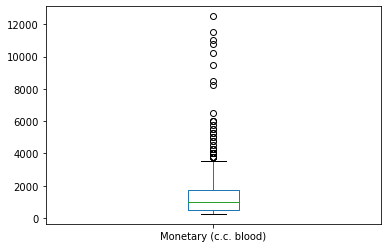

In [24]:
#Boxplot for "Monetary (c.c. blood)" feature data:

transfusion_df["Monetary (c.c. blood)"].plot(kind='box')

Monetary (c.c. blood) Feature contains lot of Outliers

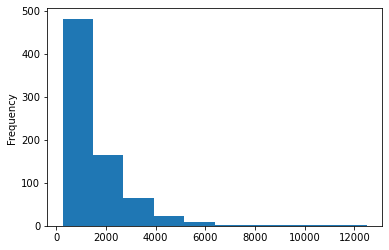

In [25]:
# Let's plot histogram for "Monetary (c.c. blood)" feature data:

transfusion_df["Monetary (c.c. blood)"].plot(kind="hist")

Yeah! This is Right skewed(Positive skewed data). when our data is not in a Gaussian Distribution(Normal), then the varience will be very high..

To convert Right Skewed data distribution into Normal distribution(in order to reduce the varience in the data), we can go for Log Normalisation technique.

In [26]:
#Log Normalisation:

Monetary = transfusion_df["Monetary (c.c. blood)"]
transfusion_df["Monetary (c.c. blood)"] = np.log10(Monetary)

In [27]:
transfusion_df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2.0,50.0,4.096910,98.0,1.0
1,0.0,13.0,3.511883,28.0,1.0
2,1.0,16.0,3.602060,35.0,1.0
3,2.0,20.0,3.698970,45.0,1.0
4,1.0,24.0,3.778151,77.0,0.0
...,...,...,...,...,...
743,23.0,2.0,2.698970,38.0,0.0
744,21.0,2.0,2.698970,52.0,0.0
745,23.0,3.0,2.875061,62.0,0.0
746,39.0,1.0,2.397940,39.0,0.0


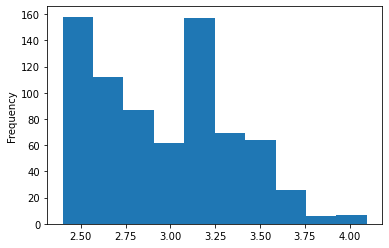

In [28]:
transfusion_df["Monetary (c.c. blood)"].plot(kind="hist")

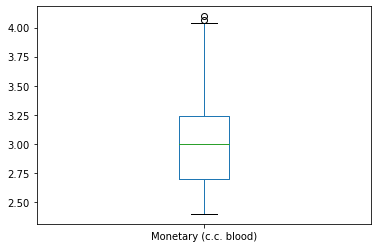

In [29]:
transfusion_df["Monetary (c.c. blood)"].plot(kind='box')

Now ["Monetary (c.c. blood)"] featues Outliers got Minimised.

In [30]:
transfusion_df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,2.959047,34.282086,0.237968
std,8.095396,5.839307,0.397171,24.376714,0.426124
min,0.000000,1.000000,2.397940,2.000000,0.000000
25%,2.750000,2.000000,2.698970,16.000000,0.000000
50%,7.000000,4.000000,3.000000,28.000000,0.000000
75%,14.000000,7.000000,3.243038,50.000000,0.000000
max,74.000000,50.000000,4.096910,98.000000,1.000000


# Now Let's Implement Logistic Regression Classifier with minimized dataset:

In [31]:
X = transfusion_df.drop("target", axis=1)
y = transfusion_df["target"]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.24, random_state=0)

In [33]:
#import the class:

from sklearn.linear_model import LogisticRegression

# Instantiate the model using default parameter:

LogisticR_Classifier = LogisticRegression()

# Let's fit the Model with data:

LogisticR_Classifier.fit(X_train, y_train)

LogisticRegression()

In [34]:
LogisticR_Classifier.score(X_train, y_train)

0.7940140845070423

In [35]:
LogisticR_Classifier.score(X_test, y_test)

0.7611111111111111

### Model Evaluation Using Confusion Matrix(For classification Related Problem):

In [36]:
y_pred2 = LogisticR_Classifier.predict(X_test)

In [37]:
#Import the metrics class:

from sklearn import metrics

Confusion_Matrix = metrics.confusion_matrix(y_test, y_pred2)
Confusion_Matrix

array([[126,   3],
       [ 40,  11]], dtype=int64)

### This problem is a binary Classification problem which contains classes like {0,1},  so it have provided us 2*2 Confusion Matrix.
    #### Here 126 and 11 are Actual Predictions.
    #### 40 and 3 are incorrect predictions

# Visualize Confusion Matrix using Heatmap:

Text(0.5, 257.44, 'Predicted Label')

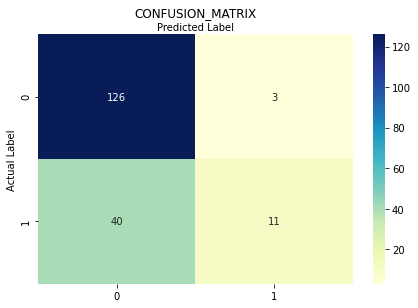

In [38]:
class_names = [0,1] #name of the classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Craete Heatmap:

sns.heatmap(pd.DataFrame(Confusion_Matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("CONFUSION_MATRIX", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

# Model Evaluation Metrix: {Accuracy, Precision, Recall}

In [39]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))
print("Precision:", metrics.precision_score(y_test, y_pred2))
print("Recall:", metrics.recall_score(y_test, y_pred2))

Accuracy: 0.7611111111111111
Precision: 0.7857142857142857
Recall: 0.21568627450980393


# ROC_AUC Curve:

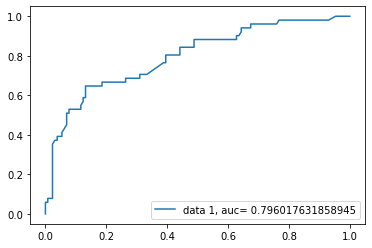


Area Under Curve:  0.796017631858945


In [40]:
y_pred_proba = LogisticR_Classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label= "data 1, auc= "+ str(auc))
plt.legend(loc='lower right')
plt.show()
print()
print("Area Under Curve: ", auc)

# Model Conclusion:

So Comparing TPOT AutoML's ExtraTreesClassifier Model, Logistic Regression Model is providing better AUC Score of 79.6%.
And Other Performance Metrics are,

    Accuracy: 0.7611111111111111 (76.1%)
    
    Precision: 0.7857142857142857 (78.6%)
    
    Recall: 0.21568627450980393 (21.6%)